# STEREO-HAND-TRACKING

### Import

In [1]:
import random
import numpy as np
from matplotlib import pyplot as plt

import os
import pickle
import cv2
from typing import Any, Tuple

import scipy.io
from tqdm.notebook import tqdm

from src.stereo_matching import StereoMatcher
from src.hand_modeling import HandModeler
from src.data_loading import DataLoader

%matplotlib inline

# For auto-reloading external modules
%load_ext autoreload
%autoreload 2

### Data Loading

In [2]:
dataloader = DataLoader('data')
left_imgs, right_imgs, label = dataloader.load_zip('B1Counting')

Extracting B1Counting:   0%|          | 0/6000 [00:00<?, ?it/s]

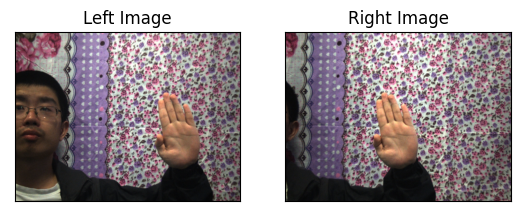

In [3]:
left_im, right_im = left_imgs[0], right_imgs[0]

fig, axes = plt.subplots(1, 2)
axes[0].imshow(cv2.cvtColor(left_im, cv2.COLOR_BGR2RGB))
axes[0].set_title('Left Image'), axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(cv2.cvtColor(right_im, cv2.COLOR_BGR2RGB))
axes[1].set_title('Right Image'), axes[1].set_xticks([]), axes[1].set_yticks([]);

## Hand Segmentation

In [4]:
hand_modeler = HandModeler(fps=24, wait_time=10)

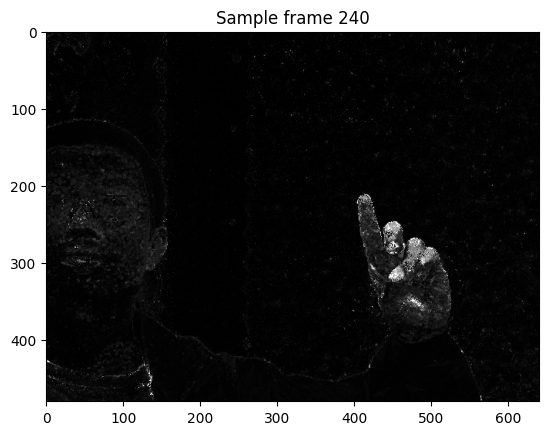

In [5]:
foreground, frame_num = None, None
for frame in range(len(left_imgs)):
    left_frame = left_imgs[frame]
    foreground = hand_modeler.estimate_hand(left_frame)
    if (foreground is not None):
        frame_num = frame
        break
plt.imshow(foreground, cmap='gray')
plt.title("Sample frame " + str(frame_num))
plt.show()

## Stereo Matching

(Text(0.5, 1.0, 'p_skin'), [], [])

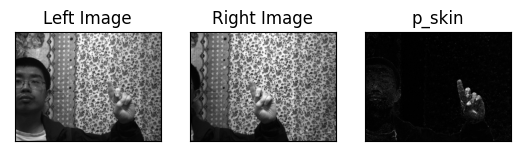

In [7]:
# stereo matching on the frame shown above
left_im, right_im = left_imgs[frame_num], right_imgs[frame_num]
left_grey = cv2.cvtColor(left_im, cv2.COLOR_BGR2GRAY)
right_grey = cv2.cvtColor(right_im, cv2.COLOR_BGR2GRAY)
fig, axes = plt.subplots(1, 3)
axes[0].imshow(left_grey, cmap='gray')
axes[0].set_title('Left Image'), axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(right_grey, cmap='gray')
axes[1].set_title('Right Image'), axes[1].set_xticks([]), axes[1].set_yticks([])
axes[2].imshow(foreground, cmap='gray')
axes[2].set_title('p_skin'), axes[2].set_xticks([]), axes[2].set_yticks([])

0 639
1 639
2 639
3 639
4 639
5 639
6 639
7 639
8 639
9 639
10 639
11 639
12 639
13 639
14 639
15 639
16 639
17 639
18 639
19 639
20 639
21 639
22 639
23 639
24 639
25 639
26 639
27 639
28 639
29 639
30 639
31 639
32 639
33 639
34 639
35 639
36 639
37 639
38 639
39 639
40 639
41 639
42 639
43 639
44 639
45 639
46 639
47 639
48 639
49 639
50 639
51 639
52 639
53 639
54 639
55 639
56 639
57 639
58 639
59 639
60 639
61 639
62 639
63 639
64 639
65 639
66 639
67 639
68 639
69 639
70 639
71 639
72 639
73 639
74 639
75 639
76 639
77 639
78 639
79 639
80 639
81 639
82 639
83 639
84 639
85 639
86 639
87 639
88 639
89 639
90 639
91 639
92 639
93 639
94 639
95 639
96 639
97 639
98 639
99 639
100 639
101 639
102 639
103 639
104 639
105 639
106 639
107 639
108 639
109 639
110 639
111 639
112 639
113 639
114 639
115 639
116 639
117 639
118 639
119 639
120 639
121 639
122 639
123 639
124 639
125 639
126 639
127 639
128 639
129 639
130 639
131 639
132 639
133 639
134 639
135 639
136 639
137 639
138 63

(Text(0.5, 1.0, 'Second best disparity'), [], [])

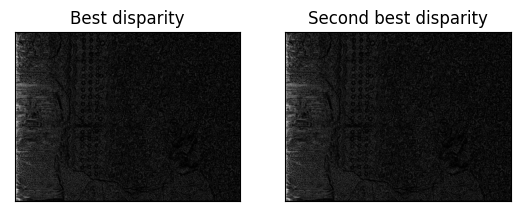

In [9]:
stereo_matcher = StereoMatcher(num_disparities=0, block_size=5) # block size 3 or 5
# disp = stereo_matcher.census_transform(left_grey)
disp, sec_disp = stereo_matcher.compute_disp(left_grey, right_grey)

fig, axes = plt.subplots(1, 2)
axes[0].imshow(disp, cmap='gray')
axes[0].set_title('Best disparity'), axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(sec_disp, cmap='gray')
axes[1].set_title('Second best disparity'), axes[1].set_xticks([]), axes[1].set_yticks([])
